In [1]:
import mlrose_hiive
import numpy as np
import time
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
# Define the fitness function
fitness = mlrose_hiive.FourPeaks(t_pct=0.1)

# Define the range of problem sizes to evaluate
problem_sizes = [20, 40, 60, 80, 100]

# Initialize data collection lists
rhc_results, ga_results, mimic_results, sa_results = [], [], [], []

In [3]:
# Iterate over problem sizes
for size in problem_sizes:
    # Define the optimization problem
    problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)

    # Random Hill Climbing
    rhc_start = time.time()
    _, best_fitness_rhc, curve_rhc = mlrose_hiive.random_hill_climb(problem, curve=True, random_state=1)
    rhc_end = time.time()
    rhc_time = rhc_end - rhc_start
    rhc_evaluations = len(curve_rhc)
    rhc_results.append((size, rhc_time, best_fitness_rhc, rhc_evaluations, rhc_evaluations / rhc_time))

    # Genetic Algorithm
    ga_start = time.time()
    _, best_fitness_ga, curve_ga = mlrose_hiive.genetic_alg(problem, curve=True, random_state=1)
    ga_end = time.time()
    ga_time = ga_end - ga_start
    ga_evaluations = len(curve_ga)
    ga_results.append((size, ga_time, best_fitness_ga, ga_evaluations, ga_evaluations / ga_time))

    # MIMIC
    mimic_start = time.time()
    _, best_fitness_mimic, curve_mimic = mlrose_hiive.mimic(problem, curve=True, random_state=1)
    mimic_end = time.time()
    mimic_time = mimic_end - mimic_start
    mimic_evaluations = len(curve_mimic)
    mimic_results.append((size, mimic_time, best_fitness_mimic, mimic_evaluations, mimic_evaluations / mimic_time))

    # Simulated Annealing
    sa_start = time.time()
    _, best_fitness_sa, curve_sa = mlrose_hiive.simulated_annealing(problem, curve=True, random_state=1)
    sa_end = time.time()
    sa_time = sa_end - sa_start
    sa_evaluations = len(curve_sa)
    sa_results.append((size, sa_time, best_fitness_sa, sa_evaluations, sa_evaluations / sa_time))

In [4]:
# Convert results to DataFrame for easier manipulation and visualization
columns = ['Problem Size', 'Time Taken', 'Best Fitness', 'Function Evaluations', 'Evaluations per Second']
rhc_df = pd.DataFrame(rhc_results, columns=columns)
ga_df = pd.DataFrame(ga_results, columns=columns)
mimic_df = pd.DataFrame(mimic_results, columns=columns)
sa_df = pd.DataFrame(sa_results, columns=columns)

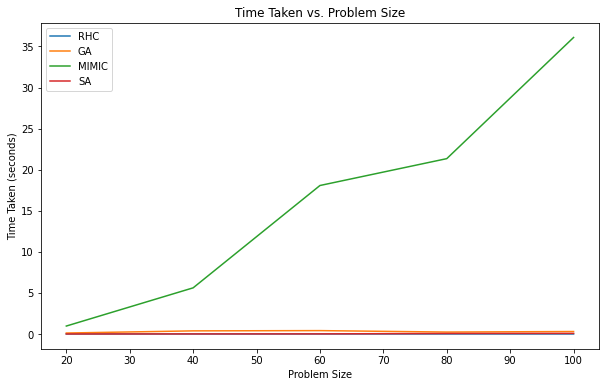

In [5]:
# Example plot: Time Taken vs. Problem Size
plt.figure(figsize=(10, 6))
plt.plot(rhc_df['Problem Size'], rhc_df['Time Taken'], label='RHC')
plt.plot(ga_df['Problem Size'], ga_df['Time Taken'], label='GA')
plt.plot(mimic_df['Problem Size'], mimic_df['Time Taken'], label='MIMIC')
plt.plot(sa_df['Problem Size'], sa_df['Time Taken'], label='SA')
plt.xlabel('Problem Size')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs. Problem Size')
plt.legend()
plt.show()

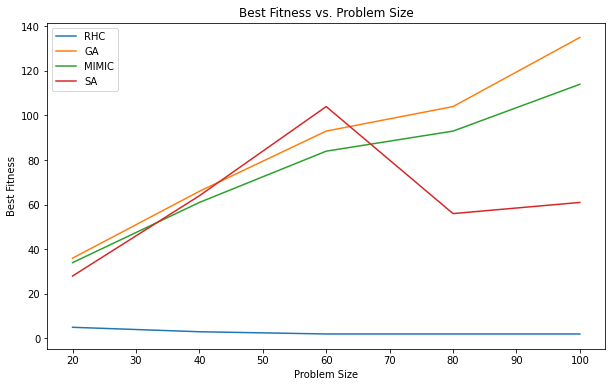

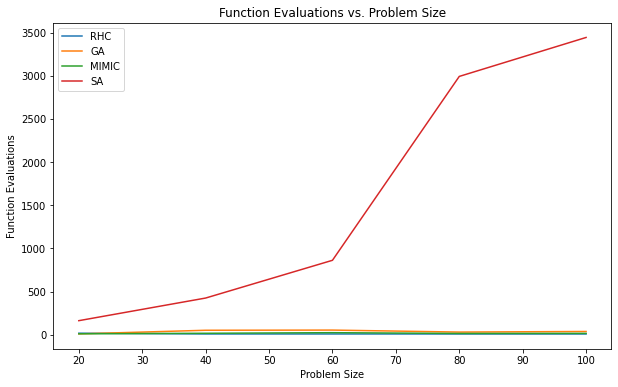

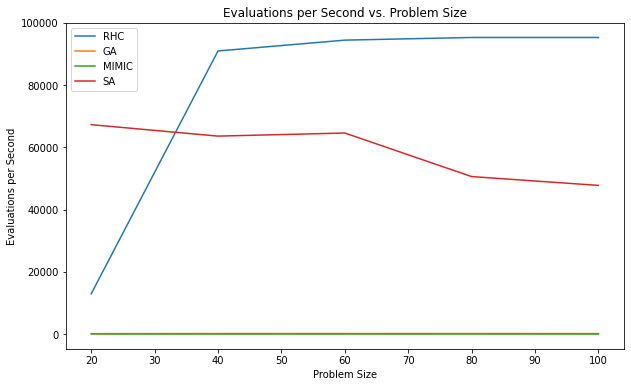

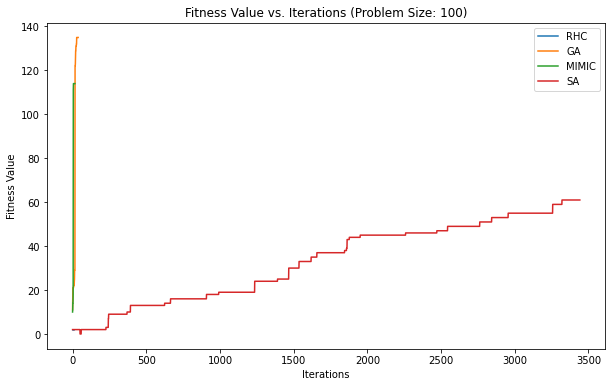

In [6]:
import matplotlib.pyplot as plt

# Best Fitness vs. Problem Size
plt.figure(figsize=(10, 6))
plt.plot(rhc_df['Problem Size'], rhc_df['Best Fitness'], label='RHC')
plt.plot(ga_df['Problem Size'], ga_df['Best Fitness'], label='GA')
plt.plot(mimic_df['Problem Size'], mimic_df['Best Fitness'], label='MIMIC')
plt.plot(sa_df['Problem Size'], sa_df['Best Fitness'], label='SA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Best Fitness vs. Problem Size')
plt.legend()
plt.show()

# Function Evaluations vs. Problem Size
plt.figure(figsize=(10, 6))
plt.plot(rhc_df['Problem Size'], rhc_df['Function Evaluations'], label='RHC')
plt.plot(ga_df['Problem Size'], ga_df['Function Evaluations'], label='GA')
plt.plot(mimic_df['Problem Size'], mimic_df['Function Evaluations'], label='MIMIC')
plt.plot(sa_df['Problem Size'], sa_df['Function Evaluations'], label='SA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations vs. Problem Size')
plt.legend()
plt.show()

# Evaluations per Second vs. Problem Size
plt.figure(figsize=(10, 6))
plt.plot(rhc_df['Problem Size'], rhc_df['Evaluations per Second'], label='RHC')
plt.plot(ga_df['Problem Size'], ga_df['Evaluations per Second'], label='GA')
plt.plot(mimic_df['Problem Size'], mimic_df['Evaluations per Second'], label='MIMIC')
plt.plot(sa_df['Problem Size'], sa_df['Evaluations per Second'], label='SA')
plt.xlabel('Problem Size')
plt.ylabel('Evaluations per Second')
plt.title('Evaluations per Second vs. Problem Size')
plt.legend()
plt.show()

# Fitness Value vs. Iterations for each algorithm at a fixed problem size (example: size=100)
# You need to run the algorithms with curve=True and keep track of the curves.
# Here's how you plot the curves for a specific problem size (e.g., last problem size in the list):

# Adjust this index if you want to plot the curves for a different problem size
index = -1  # Last element in the list (corresponding to the largest problem size)

plt.figure(figsize=(10, 6))
plt.plot(curve_rhc[:, 0], label='RHC')
plt.plot(curve_ga[:, 0], label='GA')
plt.plot(curve_mimic[:, 0], label='MIMIC')
plt.plot(curve_sa[:, 0], label='SA')
plt.xlabel('Iterations')
plt.ylabel('Fitness Value')
plt.title(f'Fitness Value vs. Iterations (Problem Size: {problem_sizes[index]})')
plt.legend()
plt.show()
